In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import imp
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import elephant
import pickle as pkl
from brian2 import ms, second
import pdb
import sys
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [4]:
d = np.load('longrun_triple_branched.npz', allow_pickle=True)['data'][()]

In [5]:
stim_times, spk_prev_i, spk_prev_t, spk_mon2_i, spk_mon2_t = map(
    d.get, ['stim_times', 'spk_prev_i', 'spk_prev_t', 'spk_mon2_i', 'spk_mon2_t'])

In [6]:
spk_prev_i = np.array(spk_prev_i)
spk_prev_t = np.array(spk_prev_t)

In [9]:
x1 = 0
x2 = 2
y1 = 2
y2 = 5
z1 = 2
z2 = 0

In [11]:
S = np.array(stim_times)
Z = np.array([(abs(s - t) <= z1) for s, t in zip(S, spk_prev_t)])
Z_A = (spk_prev_i == 0) & Z
Z_B = (spk_prev_i == 1) & Z

XX_A = np.array([t[s==0] - st for s, st, t in zip(spk_mon2_i, S, spk_mon2_t)])
XX_B = np.array([t[s==1] - st for s, st, t in zip(spk_mon2_i, S, spk_mon2_t)])
YY = np.array([t[s==2] - st for s, st, t in zip(spk_mon2_i, S, spk_mon2_t)])

X_A = np.array([any((t > x1) & (t < x2)) for t in XX_A])
X_B = np.array([any((t > x1) & (t < x2)) for t in XX_B])
Y = np.array([any((t > y1) & (t < y2)) for t in YY])

In [12]:
bins = np.arange(15)

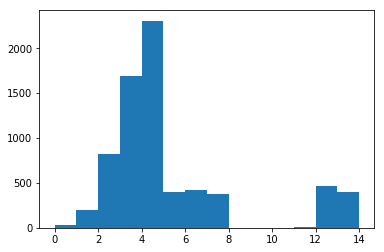

In [13]:
plt.hist([t for trial in YY for t in trial], bins=bins);

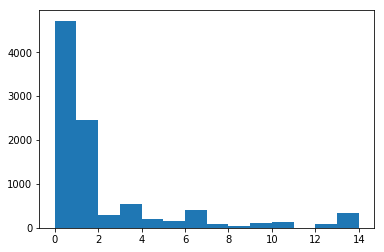

In [14]:
plt.hist([t for trial in XX_A for t in trial], bins=bins);

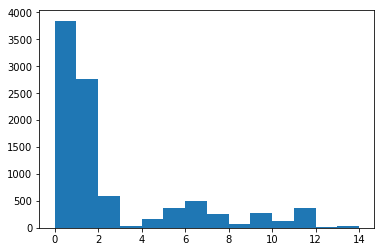

In [15]:
plt.hist([t for trial in XX_B for t in trial], bins=bins);

In [16]:
len(S), sum(Z_A), sum(Z_B)

(12816, 1939, 1201)

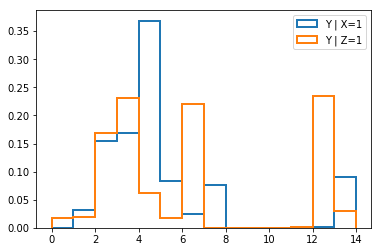

In [26]:
plt.hist([t for trial in YY[X_A==1] for t in trial], 
         bins=bins, histtype='step', lw=2, label='Y | X=1', density=True);

plt.hist([t for trial in YY[Z_A==1] for t in trial], 
         bins=bins, histtype='step', lw=2, label='Y | Z=1', density=True);

plt.legend()

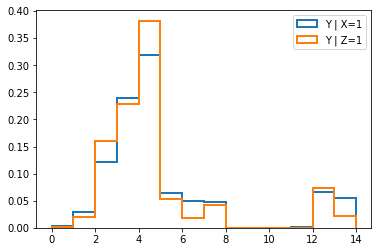

In [27]:
plt.hist([t for trial in YY[X_B==1] for t in trial], 
         bins=bins, histtype='step', lw=2, label='Y | X=1', density=True);
plt.hist([t for trial in YY[Z_B==1] for t in trial], 
         bins=bins, histtype='step', lw=2, label='Y | Z=1', density=True);

plt.legend()

In [24]:
Y[X_A==1].mean() - Y[Z_A==1].mean()

-0.024639104159587588

In [25]:
Y[X_B==1].mean() - Y[Z_B==1].mean()

-0.05573935487446796

In [28]:
Y[X_A==1].mean() - Y[X_A==0].mean()

-0.08023019995730452